In [1]:
import os.path

import tensorflow as tf
import numpy as np
import pandas as pd
from helpers import scaling,scaling_reverse, RSquaredSeparated
import h5py
from matplotlib import pyplot as plt


2024-07-08 15:54:56.604811: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-08 15:54:56.607075: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-08 15:54:56.636162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 15:54:57.595678: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = "run3_dataset_10000_test.h5"
input_df = pd.read_hdf(dataset,key="input")
output_df = pd.read_hdf(dataset,key="output")


In [3]:
for i in range(115):
    print(input_df.columns[i], input_df.columns[i+115])

ARS01_DBPM_0760_X ARS01_DBPM_0760_Y
ARS01_DBPM_1080_X ARS01_DBPM_1080_Y
ARS01_DBPM_1460_X ARS01_DBPM_1460_Y
ARS01_DBPM_1900_X ARS01_DBPM_1900_Y
ARS01_DBPM_2410_X ARS01_DBPM_2410_Y
ARS01_DBPM_2910_X ARS01_DBPM_2910_Y
ARS01_DBPM_4220_X ARS01_DBPM_4220_Y
ARS01_DBPM_4720_X ARS01_DBPM_4720_Y
ARS01_DBPM_5250_X ARS01_DBPM_5250_Y
ARS01_DBPM_5880_X ARS01_DBPM_5880_Y
ARS02_DBPM_1080_X ARS02_DBPM_1080_Y
ARS02_DBPM_1460_X ARS02_DBPM_1460_Y
ARS02_DBPM_1900_X ARS02_DBPM_1900_Y
ARS02_DBPM_2410_X ARS02_DBPM_2410_Y
ARS02_DBPM_2910_X ARS02_DBPM_2910_Y
ARS02_DBPM_4220_X ARS02_DBPM_4220_Y
ARS02_DBPM_4720_X ARS02_DBPM_4720_Y
ARS02_DBPM_5250_X ARS02_DBPM_5250_Y
ARS02_DBPM_5880_X ARS02_DBPM_5880_Y
ARS03_DBPM_0810_X ARS03_DBPM_0810_Y
ARS03_DBPM_1080_X ARS03_DBPM_1080_Y
ARS03_DBPM_1460_X ARS03_DBPM_1460_Y
ARS03_DBPM_1900_X ARS03_DBPM_1900_Y
ARS03_DBPM_2410_X ARS03_DBPM_2410_Y
ARS03_DBPM_2910_X ARS03_DBPM_2910_Y
ARS03_DBPM_4220_X ARS03_DBPM_4220_Y
ARS03_DBPM_4720_X ARS03_DBPM_4720_Y
ARS03_DBPM_5250_X ARS03_DBPM

In [4]:
input_df.head()

ARS01_DBPM_0760_X  ARS01_DBPM_1080_X  ARS01_DBPM_1460_X  \
221           -0.546829          -0.156270           0.072100   
7693          -0.451926          -0.056627           0.110686   
8952          -0.644923          -0.158573           0.094584   
3662          -0.557040          -0.171334           0.064673   
8593          -0.598743          -0.198813           0.057061   

      ARS01_DBPM_1900_X  ARS01_DBPM_2410_X  ARS01_DBPM_2910_X  \
221            0.341886          -0.512406           0.668353   
7693           0.291316          -0.490912           0.685585   
8952           0.386379          -0.619877           0.804661   
3662           0.346034          -0.507022           0.655392   
8593           0.365506          -0.526110           0.668558   

      ARS01_DBPM_4220_X  ARS01_DBPM_4720_X  ARS01_DBPM_5250_X  \
221           -0.600898           0.513508          -0.214899   
7693          -0.653669           0.588086          -0.297804   
8952          -0.751115           0.636169          -0.292992   
3662          -0.581434           0.493279          -0.196612   
8593          -0.585754           0.488735          -0.183760   

      ARS01_DBPM_5880_X  ...  ARS12_DBPM_1080_Y  ARS12_DBPM_1460_Y  \
221            0.050106  ...           0.090532           0.265221   
7693           0.156848  ...           0.078212           0.246131   
8952           0.088001  ...           0.064766           0.248464   
3662           0.031562  ...           0.095161           0.269186   
8593           0.008085  ...           0.084963           0.257759   

      ARS12_DBPM_1900_Y  ARS12_DBPM_2410_Y  ARS12_DBPM_2910_Y  \
221            0.272789           0.288359           0.171183   
7693           0.260854           0.282907           0.175803   
8952           0.274394           0.306253           0.194488   
3662           0.273527           0.286074           0.167432   
8593           0.268941           0.287359           0.173449   

      ARS12_DBPM_4220_Y  ARS12_DBPM_4720_Y  ARS12_DBPM_5250_Y  \
221           -0.014746          -0.131000          -0.175798   
7693          -0.003915          -0.122848          -0.173267   
8952          -0.003906          -0.142185          -0.207554   
3662          -0.017060          -0.129964          -0.171457   
8593          -0.010831          -0.128240          -0.175980   

      ARS12_DBPM_5880_Y  ARS01_DBPM_0390_Y  
221           -0.055354           0.295803  
7693          -0.061123           0.272585  
8952          -0.090611           0.264810  
3662          -0.050061           0.300513  
8593          -0.060428           0.275779  

[5 rows x 230 columns]

In [5]:
output_df.head()

ARS01_MCOX_0740  ARS01_MCOX_1090  ARS01_MCOX_1470  ARS01_MCOX_1910  \
221         -0.312519        -0.242236         0.328337         0.051800   
7693        -0.311446        -0.239240         0.331372         0.051657   
8952        -0.311143        -0.238225         0.330905         0.051642   
3662        -0.311787        -0.240175         0.330644         0.051679   
8593        -0.310986        -0.238456         0.331360         0.051648   

      ARS01_MCOX_2420  ARS01_MCOX_2920  ARS01_MCOX_4230  ARS01_MCOX_4730  \
221          0.438325         0.431851         0.434457         0.434370   
7693         0.438253         0.431778         0.434385         0.434296   
8952         0.438211         0.431736         0.434343         0.434253   
3662         0.438253         0.431778         0.434384         0.434295   
8593         0.438241         0.431765         0.434369         0.434278   

      ARS01_MCOX_5260  ARS01_MCOX_5890  ...  ARS12_MCOY_1110  ARS12_MCOY_1490  \
221          0.170410         0.352321  ...        -0.614665        -0.326920   
7693         0.170321         0.355848  ...        -0.609494        -0.327232   
8952         0.170497         0.354434  ...        -0.631967        -0.330002   
3662         0.170538         0.353589  ...        -0.604532        -0.327516   
8593         0.169490         0.350949  ...        -0.611130        -0.327778   

      ARS12_MCOY_1930  ARS12_MCOY_2430  ARS12_MCOY_2930  ARS12_MCOY_4240  \
221          0.037826        -0.444931        -0.489554        -0.486590   
7693         0.037843        -0.444933        -0.489553        -0.486589   
8952         0.037994        -0.444942        -0.489551        -0.486588   
3662         0.037859        -0.444933        -0.489553        -0.486589   
8593         0.037874        -0.444935        -0.489554        -0.486589   

      ARS12_MCOY_4740  ARS12_MCOY_5270  ARS12_MCOY_5900  ARS01_MCOY_0400  
221         -0.226255        -0.328291         0.006523        -0.132251  
7693        -0.226254        -0.328517         0.004239        -0.132736  
8952        -0.226253        -0.324142         0.013969        -0.132568  
3662        -0.226254        -0.328866         0.007895        -0.130807  
8593        -0.226254        -0.322287         0.011346        -0.132536  

[5 rows x 230 columns]

In [6]:
input =  input_df.values
output = output_df.values

In [7]:
path = "/home/guney/PycharmProjects/Summerproject/out/out/2024-06-25-212542/2/"

In [8]:

# Path to your HDF5 file
file_path = path + "../Limits_scale.h5"
orbit_min =None
orbit_max = None
corr_min = None
corr_max = None
# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hdf:
    orbit_min = np.array(hdf['orbit_min'])
    orbit_max = np.array(hdf['orbit_max'])
    corr_min = np.array(hdf['corr_min'])
    corr_max = np.array(hdf['corr_max'])
    
print(orbit_min.mean(), orbit_max.mean(),corr_max.mean(),corr_min.mean())

-0.2576144994919263 0.27968792393896313 -0.03135473106389157 -0.03779608008410241


In [9]:
input = scaling(input,orbit_min,orbit_max,0,1)


In [10]:
#normalization = tf.keras.layers.Normalization()
#normalization.adapt(input1.values)
#input1 = normalization(input1)
print(input.shape)

(10100, 230)


In [11]:
model = tf.keras.models.load_model(path+"my_model_try.keras")
model.summary()

2024-07-08 15:55:06.087354: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-08 15:55:06.089729: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 230)            │           920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 230)            │        53,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 230)            │           920 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 230)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 230)            │        53,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,462 (2.46 MB)

 Trainable params: 107,180 (837.34 KB)

 Non-trainable params: 920 (7.19 KB)

 Optimizer params: 214,362 (1.64 MB)

In [12]:
inference =model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)

176/316 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step

I0000 00:00:1720446906.795317    9086 service.cc:145] XLA service 0x7ffa4802c380 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720446906.795348    9086 service.cc:153]   StreamExecutor device (0): Host, Default Version
2024-07-08 15:55:06.799817: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1720446906.830689    9086 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
np.mean(np.abs(inference-output)*1e3)
#0.00038029890206441963

0.2114342522312661

In [14]:

metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [23]:
inputcut =np.copy(input)
inputcut[:,20] = -5

In [24]:
 inference = model.predict(inputcut)
inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [17]:
np.mean(np.abs(inference - output))

0.00021143425223126605

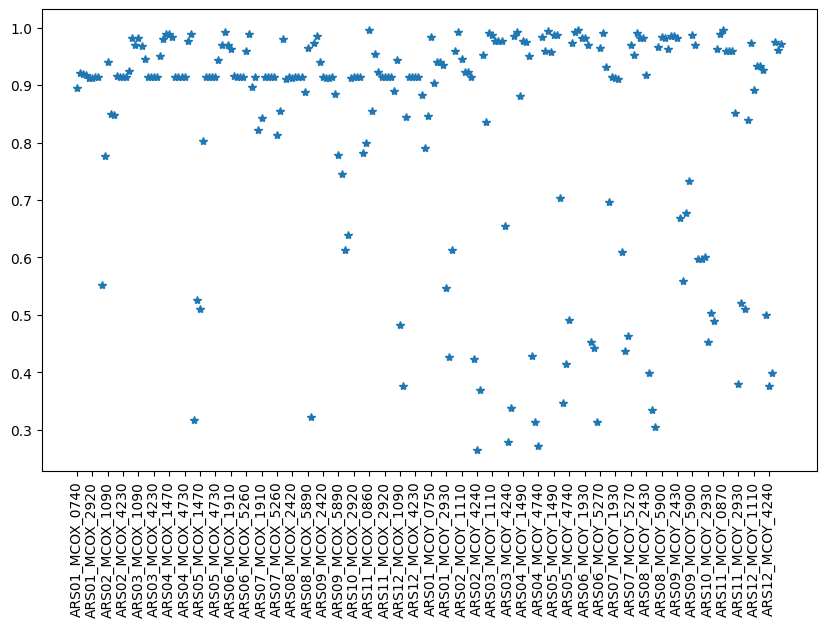

In [18]:
metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()